<h1><center>

# Machine Learning Project - Group 44
    
</center></h1>

### This project was developed by:
- Bruno Alho, m20200111
- Madalena Valério, m20200567
- Pedro Fonseca, m20201037

This project is also avaliable on __Github__, where it was was to used to exchange code between the group members and to keep track of all the modifications that were made throughout the entire project.

__Link__: https://github.com/its-pedrofonseca/Machine-Learning-Project



### Quick Overview:

In a futuristic scenario, where the planet Earth has become unviable, the need to expand to other planets has insurged, therefore the mission Newland is created.

With need to populate the new world, Newland has decided to apply taxes in order to make the mission financially sustainable, based on their candidates income.

To apply these taxes, a series of meta-estimators were applied to a dataset on top of a previous data selection and feature engineering, in order to predict who will pay more taxes. For the people below an average income a tax rate of 15% would be applied and for those who have an income above average a 30% tax rate would be applied. In other words, the predictions that the group will be making will try to predict who will pay more or less taxes, based on their income. 

The score of this prediction is evaluated using the f1-score metric. 


The original data has been split into two groups, the training set, with 22400 observations and the test set, with 10100 observations.

<div class="alert alert-block alert-info">
    
# Table of Content<a class="anchor"><a id='toc'>
* [<font color='#E8800A'>1 - Imports</font>](#first-bullet)
- [<font color='#E8800A'>2 - Functions</font>](#second-bullet)
- [<font color='#E8800A'>3 - Reading the data and initial Feature Engineering</font>](#third-bullet)
- [<font color='#E8800A'>4 - Defining Categorical and Numerical Features</font>](#fourth-bullet)
- [<font color='#E8800A'>5 - Data Visualization and Feature Engineering for Categorical Features</font>](#fifth-bullet)
- [<font color='#E8800A'>6 - Data Visualization and Feature Engineering for Numerical Features</font>](#sixth-bullet)
- [<font color='#E8800A'>7 - Applying One Hot Encoder</font>](#seventh-bullet)
- [<font color='#E8800A'>8 - Gradient Boost Classifier</font>](#eighth-bullet)
- [<font color='#E8800A'>9 - AdaBoost Classifier</font>](#nineth-bullet)
- [<font color='#E8800A'>10 - Random Forest Classifier</font>](#tenth-bullet)
- [<font color='#E8800A'>11 - Multilayer Perceptron (MLP)</font>](#eleventh-bullet)
- [<font color='#E8800A'>12 - Decision Tree</font>](#twelveth-bullet)
- [<font color='#E8800A'>13 - Stochastic Gradient Descent (SGD) Classifier</font>](#thirteenth-bullet)
- [<font color='#E8800A'>14 - Extra Trees Classifier</font>](#fourteenth-bullet)
- [<font color='#E8800A'>15 - Overview</font>](#fifthteen-bullet)
- [<font color='#E8800A'>16 - Export</font>](#sixthteen-bullet) 
</div>

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>1 - Imports</font> <a class="anchor" id="first-bullet"></a>
    
</div>

[Back to TOC](#toc)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import os
from catboost import CatBoostClassifier, Pool, cv
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder,LabelEncoder,MaxAbsScaler,RobustScaler
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE,ADASYN,SMOTE,SVMSMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from math import ceil
from numpy.random import RandomState
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>2 - Functions</font> <a class="anchor" id="second-bullet"></a>
    
</div>

[Back to TOC](#toc)

In [2]:
def bar_charts_categorical(df, feature, target):
    """
    Function that plots the frequency and the importance that a categorical variable has with the target
    """
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

In [3]:
def metrics(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the classification report and the confusion matrix of the train and validation dataset
    """
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    

In [4]:
def micro_f1_score(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the micro f1 score of the train and validation dataset
    """
    print('_____________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f1_score(y_train, pred_train, average='micro'))

    print('_____________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f1_score(y_val, pred_val, average='micro'))
    return f1_score(y_val, pred_val, average='micro')

In [5]:
def best_scale(model,X_train,y_train,X_test,y_test):
    """
    Function that returns a table with the micro f1 score for the different scaler
    """
    standard=StandardScaler().fit(X_train).transform(X_train)
    standardTest=StandardScaler().fit(X_test).transform(X_test)

    minMax=MinMaxScaler().fit(X_train).transform(X_train)
    minMaxTest=MinMaxScaler().fit(X_test).transform(X_test)

    maxAbs=MaxAbsScaler().fit(X_train).transform(X_train)
    maxAbsTest=MaxAbsScaler().fit(X_test).transform(X_test)
        
    robust=RobustScaler().fit(X_train).transform(X_train)
    robustTest=RobustScaler().fit(X_test).transform(X_test)

    sclares=[standard,minMax,maxAbs,robust,X_train]
    sclaresTest=[standardTest,minMaxTest,maxAbsTest,robustTest,X_test]
    
    f_score=[]
    
    for i in range(len(sclares)):
        model.fit(sclares[i],y_train)
        y_pred=model.predict(sclaresTest[i])
        f_score.append(f1_score(y_pred,y_test,average="micro"))
        

    return pd.DataFrame(f_score,index=["Standard","MinMax","MaxAbs","Robust","No Scaler"], columns=["F1 Score"])
    

In [6]:
def roc_curve_plot(model,X_train,X_test,y_test,y_train):
    """
    Function that plots the roc curve for a given model
    """
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model.predict(X_train))
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model.predict(X_test))
    plt.plot(fpr_train, tpr_train,label="ROC Curve train")
    plt.plot(fpr_test, tpr_test,label="ROC Curve test")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>3 - Reading the data and initial Feature Engineering</font> <a class="anchor" id="third-bullet"></a>
    
</div>

[Back to TOC](#toc)

In [7]:
original = pd.read_excel("train.xlsx")
original.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [8]:
df=original.copy()

Replacing the question marks that appear in the dataframe by nans.

In [9]:
df.replace("?", np.nan, inplace=True)
df.isna().sum()

CITIZEN_ID                   0
Name                         0
Birthday                     0
Native Continent             0
Marital Status               0
Lives with                   0
Base Area                  395
Education Level              0
Years of Education           0
Employment Sector         1264
Role                      1271
Working Hours per week       0
Money Received               0
Ticket Price                 0
Income                       0
dtype: int64

Check the amount of NA values in percentage per each variable.

In [10]:
df.isna().sum()/len(df)*100

CITIZEN_ID                0.000000
Name                      0.000000
Birthday                  0.000000
Native Continent          0.000000
Marital Status            0.000000
Lives with                0.000000
Base Area                 1.763393
Education Level           0.000000
Years of Education        0.000000
Employment Sector         5.642857
Role                      5.674107
Working Hours per week    0.000000
Money Received            0.000000
Ticket Price              0.000000
Income                    0.000000
dtype: float64

Separation of the variable name, thus making two columns, the Gender column and the Name column. 

In [11]:
df[["Gender","Name"]]=df["Name"].str.split(" ", n=1,expand=True)
df["Gender"].replace(["Mr."],"M",inplace=True)
df["Gender"].replace(["Miss","Mrs."],"F",inplace=True)

Separation of the variable birthday, thus making two columns, the month column and the year column. 

In [12]:
df[["Month","Year"]]=df['Birthday'].str.split(",",expand=True)
df["Year"]=df["Year"].astype(int)
df["Age"] = 2046 - df["Year"]

Setting the dataframe index to citizen_id.

In [13]:
df.set_index("CITIZEN_ID",inplace=True)

Dropping unnecessary variables.

In [14]:
df.drop(["Name","Month","Year","Birthday"],inplace=True,axis=1)

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>4 - Defining categorical and numerical features</font> <a class="anchor" id="fourth-bullet"></a>
    
</div>

[Back to TOC](#toc)

Defining the categorical and numerical features.

In [15]:
categorical = df.select_dtypes(include="object").columns.to_list()
numerical = df.columns.drop(categorical).drop("Income").to_list()

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>5 - Data Visualization and Feature Engineering for Categorical Features</font> <a class="anchor" id="fifth-bullet"></a>
    
</div>

[Back to TOC](#toc)

Data Visualization of the Categorical features in Bar Plots before Feature Engineering has been applied.

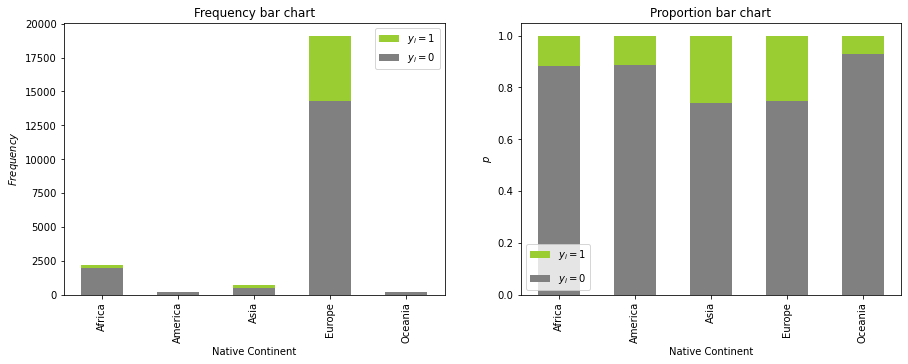

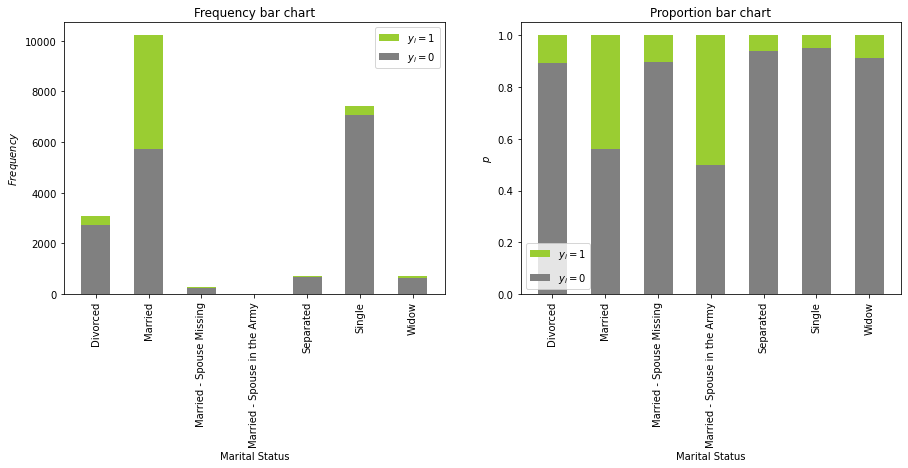

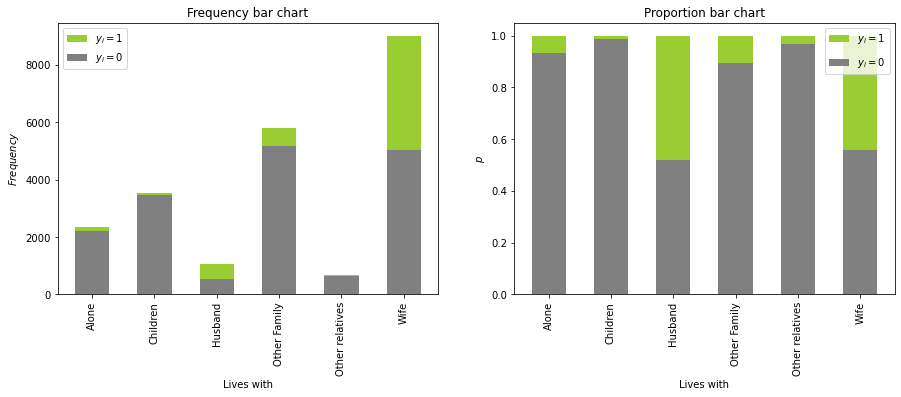

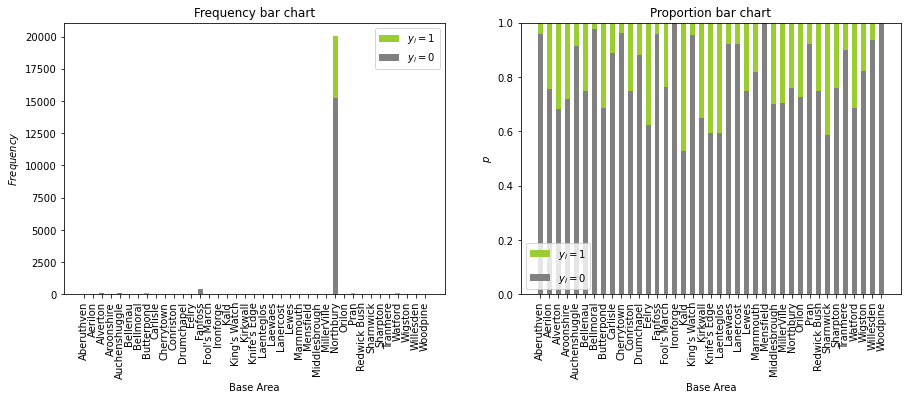

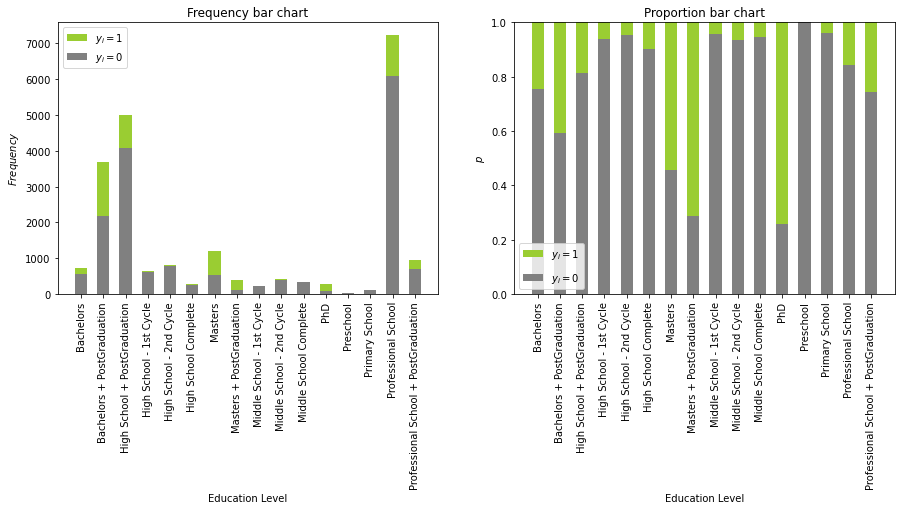

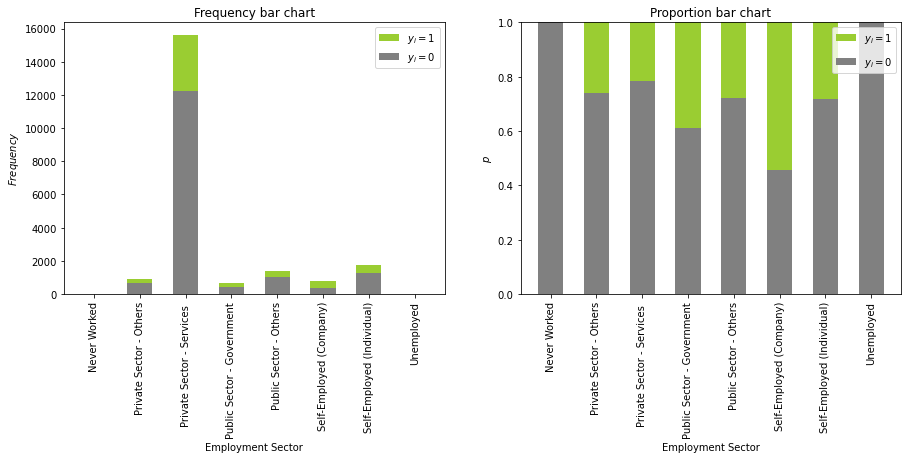

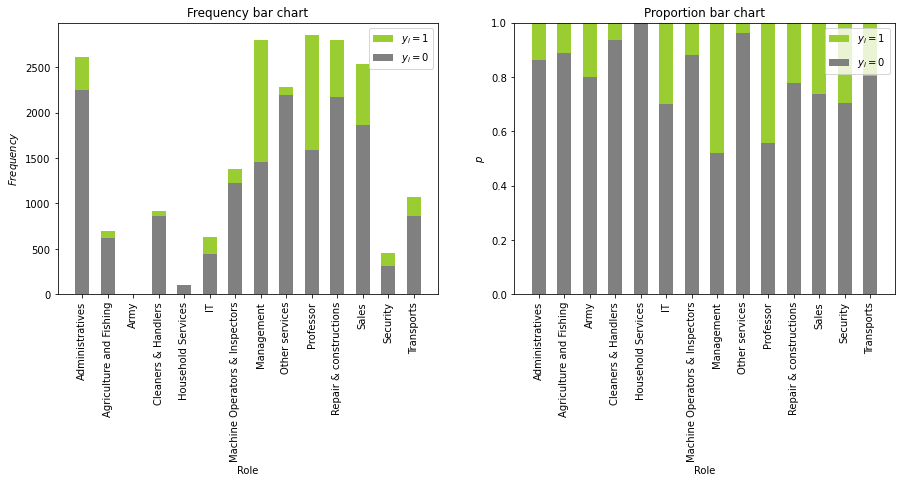

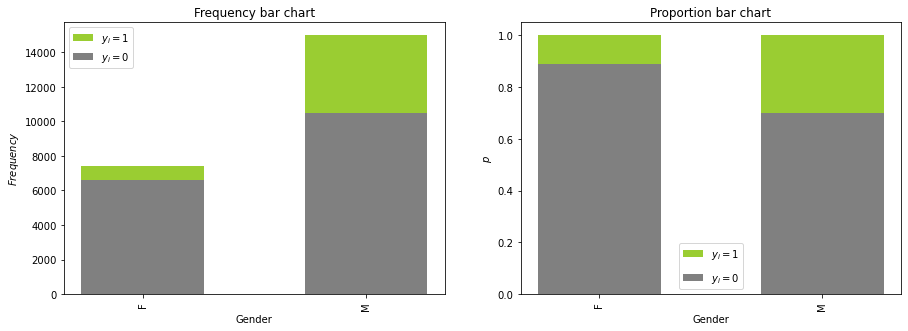

In [16]:
for i in categorical:   
    bar_charts_categorical(df, i, "Income")

Now that we have seen the data, we can apply some feature engineering to the variables in order to make them simpler and easier to apply the Supervised Learning Models in the future.

Reducing the number of variables in "Marital Status", replacing the variables to "Married" or "Other".

In [17]:
df["Marital Status"].replace(["Married - Spouse in the Army" ],"Married",inplace=True)
df["Marital Status"].replace(["Married - Spouse Missing" ,"Widow","Divorced"],"Other",inplace=True)

Reducing the number of variables in "Lives With", replacing the variables to "Partner" or "Other".

In [18]:
df["Lives with"].replace(["Husband","Wife" ],"Partner",inplace=True)
df["Lives with"].replace(["Other relatives","Children"],"Other",inplace=True)

Removing "Base Area" from the dataframe, since it has too many categories.

In [19]:
df.drop(["Base Area"],axis=1,inplace=True)
categorical.remove("Base Area")

Reducing the number of variables in "Education Level", replacing the variables to "No College Degree", "1 Degree", "2 Degrees" and "3 Degrees".

In [20]:
df["Education Level"].replace(["High School - 2nd Cycle","High School - 1st Cycle","Middle School Complete","Primary School","Preschool","High School Complete","High School - 1st Cycle","High School - 2nd Cycle","Professional School","Middle School - 1st Cycle","Middle School - 2nd Cycle"],"No college degree",inplace=True)
df["Education Level"].replace(["High School + PostGraduation","Bachelors","Professional School + PostGraduation"],"1 Degree",inplace=True)
df["Education Level"].replace(["Bachelors + PostGraduation","Masters"],"2 Degrees",inplace=True)
df["Education Level"].replace(["Masters + PostGraduation","PhD"],"3 Degrees",inplace=True)

Reducing the number of variables in "Emplyment Sector", replacing the variables to "Private Sector", "Public Sector" and         "Other".

In [21]:
df["Employment Sector"].replace(["Private Sector - Services ","Private Sector - Others"],"Private Sector",inplace=True)
df["Employment Sector"].replace(["Public Sector - Others","Public Sector - Government"],"Public Sector",inplace=True)
df["Employment Sector"].replace(["Unemployed","Never Worked"],"Other",inplace=True)

Reducing the number of variables in "Role", replacing the variables to "Other Services".

In [22]:
df["Role"].replace(["Cleaners & Handlers","Machine Operators & Inspectors","Administratives","Agriculture and Fishing","Household Services"],"Other services",inplace=True)

Data Visualization of the Categorical features in Bar Plots after Feature Engineering has been applied.

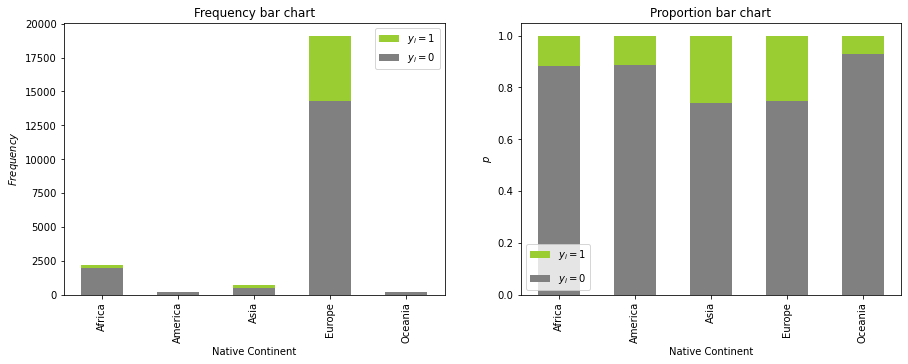

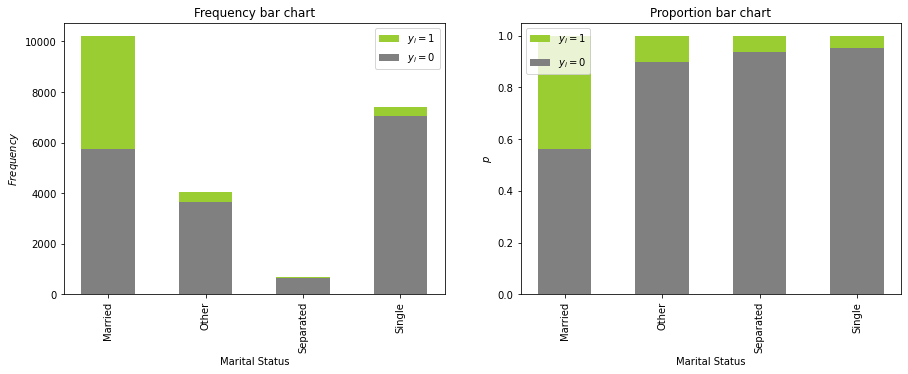

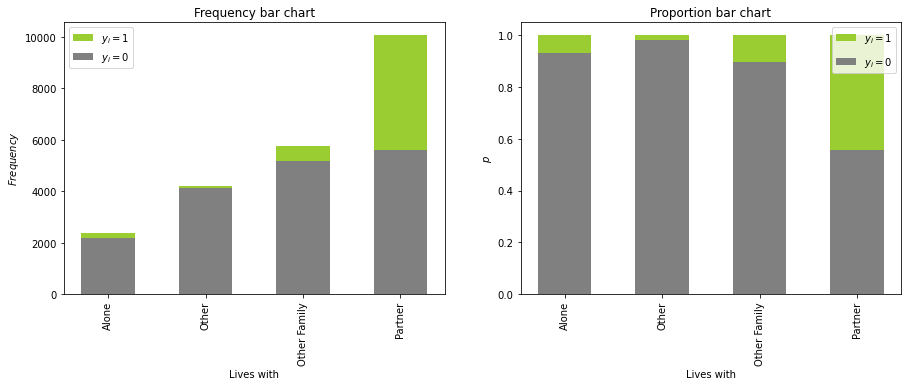

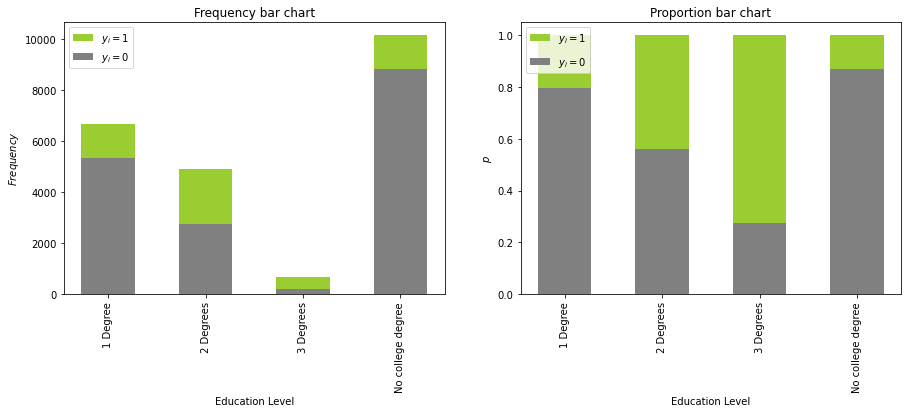

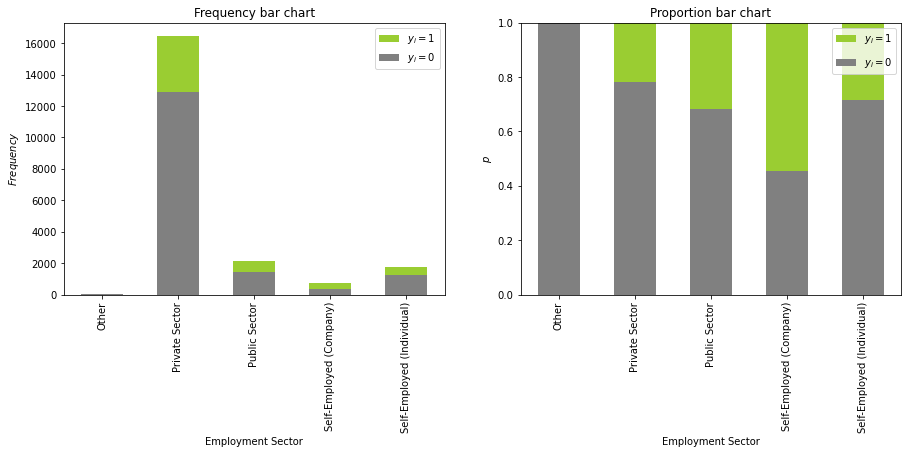

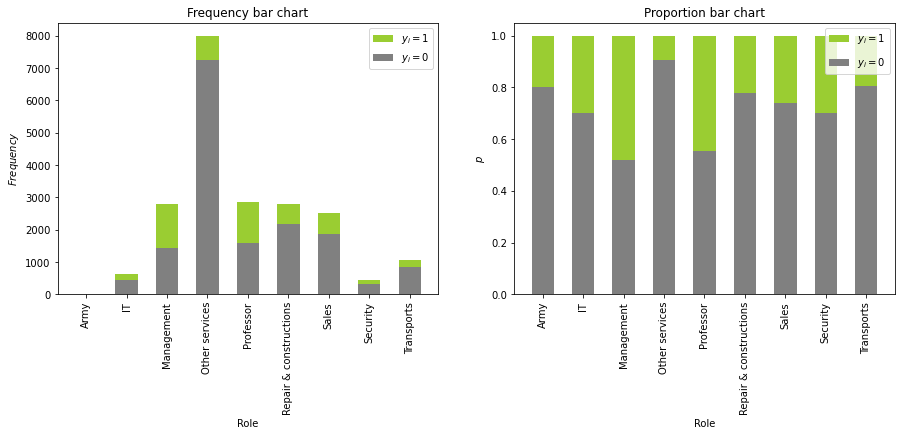

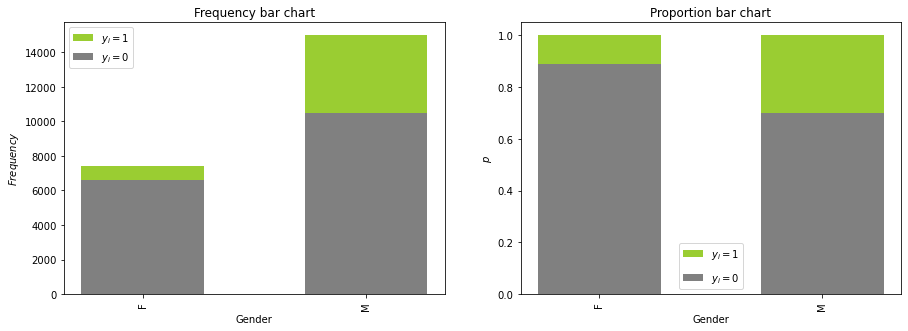

In [23]:
for i in categorical:   
    bar_charts_categorical(df, i, "Income")

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>6 - Data Visualization and Feature Engineering for Numerical Features</font> <a class="anchor" id="sixth-bullet"></a>
    
</div>

[Back to TOC](#toc)

Data Visualization of the Numerical features in Box Plots and in correlation before Feature Engineering has been applied.

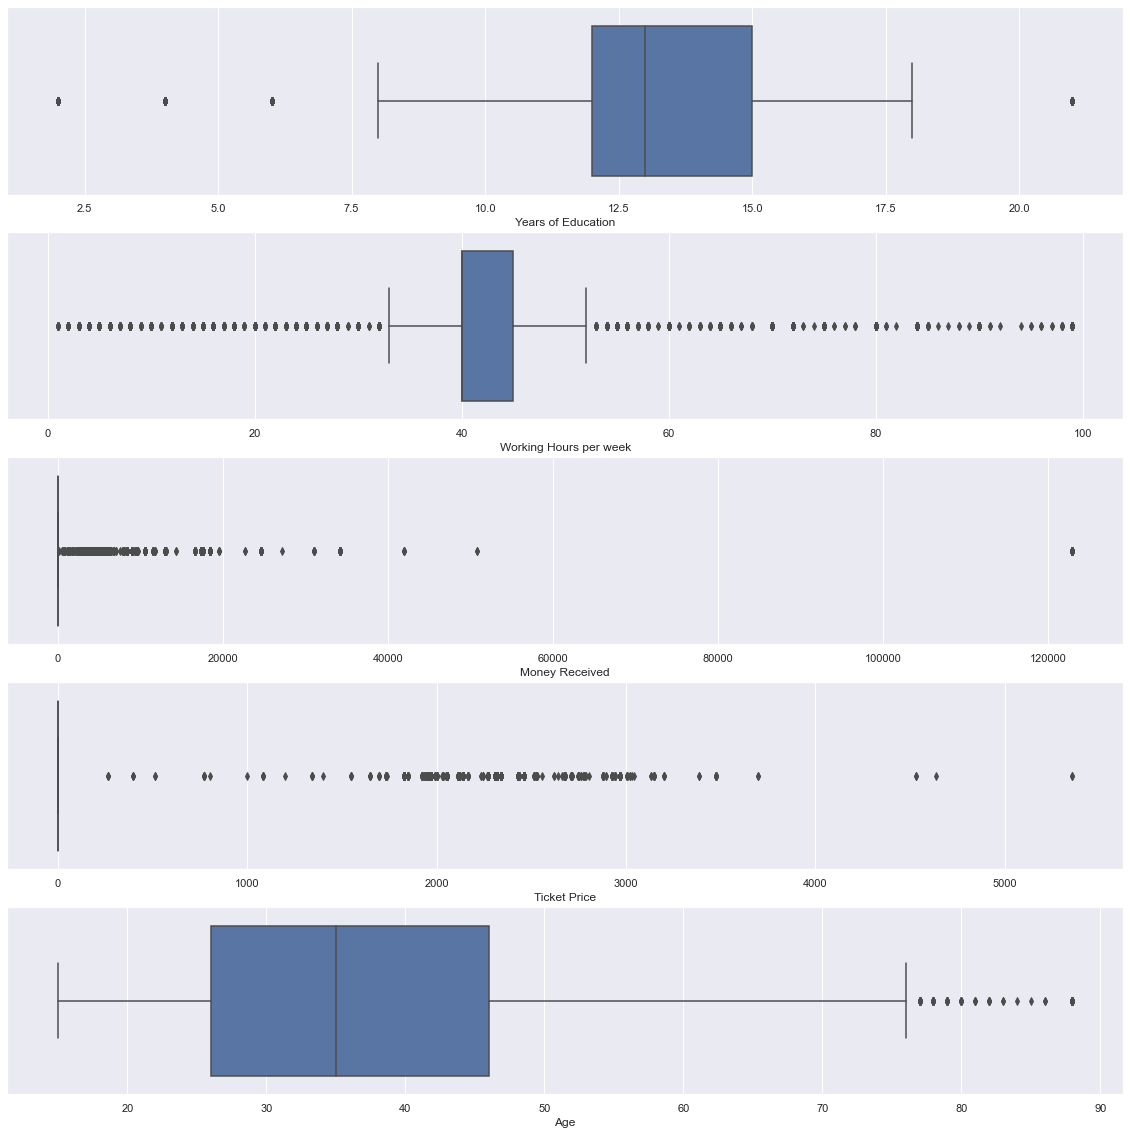

In [24]:
sns.set()
fig, axes = plt.subplots(len(numerical), ceil(len(numerical) / len(numerical)), figsize=(20, 20))
for ax, feat in zip(axes.flatten(), numerical):
    sns.boxplot(x=df[feat], ax=ax) 
plt.show()

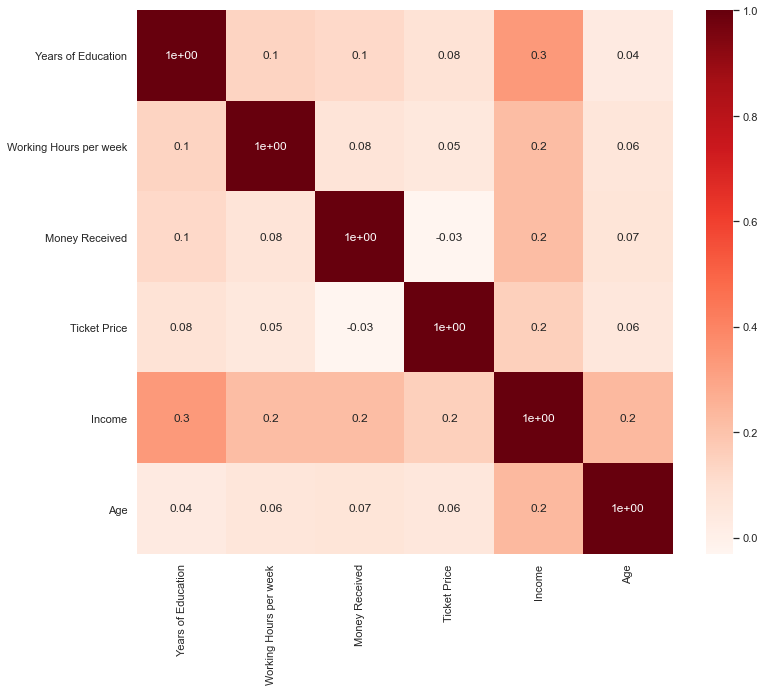

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(data = df.corr(), annot = True, cmap = plt.cm.Reds, fmt='.1')
plt.show()

### 6.1 - Removing Outliers

As we can see in the previous box plots, there are outliers that can be removed. It is important that it isn't removed more than 3/4 % of outliers, else the dataset would be labeled as corrupted.

In [26]:
filters = (
    (df["Working Hours per week"]>7)
    & 
    (df["Years of Education"]<20)
    &
    (df["Ticket Price"]<4000)
    &
    (df["Money Received"]<120000))

df1=df[filters]
print('Percentage of data removed by Outliers:',  np.round(1 - np.round(df1.shape[0] / original.shape[0], 4), 4) * 100, '%')
#df=df1.copy()

Percentage of data removed by Outliers: 2.65 %


Turn out we didn't use outliers removel since we get better scores without it

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>7 - Applying One Hot Encoder</font> <a class="anchor" id="seventh-bullet"></a>
    
</div>

[Back to TOC](#toc)

### 7.1 - Fill Missing Values

Fill the missing values with the modes function that inputs the most frequently occurring number found in a set of numbers.

In [27]:
modes = df[categorical].mode().loc[0]
df.fillna(modes,inplace=True)

### 7.2 - Separating X and Y

Separating the X and y values based on their income.

In [28]:
X=df.drop(["Income","Native Continent"],axis=1)
y=df.loc[:,"Income"]
categorical=X.select_dtypes(include="object").columns.to_list()

### 7.3 - One Hot Encoder

Applying the One Hot Encoder to the categorical features, after the X and Y values have been separated. This allows for each categorical feature, to create a new column per each category that exists in that feature.

In [29]:
df_ohc = X.copy()
categorical=X.select_dtypes(include="object").columns.to_list()
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc[categorical])
ohc_feat_names = ohc.get_feature_names(categorical)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_ohc = pd.concat([ohc_df,df_ohc.drop(columns=categorical)], axis=1)
X=df_ohc.copy()
X.head()

,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Lives with_Alone,Lives with_Other,Lives with_Other Family,Lives with_Partner,Education Level_1 Degree,Education Level_2 Degrees,...,Role_Sales,Role_Security,Role_Transports,Gender_F,Gender_M,Years of Education,Working Hours per week,Money Received,Ticket Price,Age
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
12486,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13,40,0,2273,43
12487,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,12,40,0,0,40
12488,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,12,46,0,2321,37
12489,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,11,37,5395,0,61
12490,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,21,45,0,0,31


In [30]:
X.drop(["Marital Status_Separated","Lives with_Other","Education Level_3 Degrees","Employment Sector_Other","Role_Army","Gender_F"],axis=1,inplace=True)

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>8 - Gradient Boost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

[Back to TOC](#toc)

Gradient Boost builds an additive model in a forward stage-wise style. It allows for the optimization of arbitrary differentiable loss functions. 

In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

### 8.1 - Data Splitting

Splitting the variables acordingly to the respective train and test datasets.

X_train is the training data set. Y_train is the set of labels to all the data in X_train . The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### 8.2 - Model

Creation of the Gradient Boost Classifier, accordingly with the parameters, attributes and methods avaliable at:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [228]:
gb = GradientBoostingClassifier(n_estimators=100,max_features=15,random_state=100,max_depth=16,min_samples_leaf=8) 
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=16, max_features=15, min_samples_leaf=8,
                           random_state=100)

Running the function defined in the section "2 - Functions", to compare the different scaler methods between themselves, when applied to the model that was previously created.

In [33]:
best_scale(gb,X_train,y_train,X_test,y_test)

,F1 Score
Standard,0.839732
MinMax,0.858036
MaxAbs,0.858259
Robust,0.859375
No Scaler,0.858482


### 8.3 - Feature Selection

Getting the features with most importance in the dataset, accordingly with the model that is being used. This is very helpful in a way that the features that have low or none relevance can be dropped in order to get a better performance for this model.
It is also created a barplot with the features importances to visualize the variables that are more important.

In [34]:
importances = gb.feature_importances_
indices = np.argsort(importances)

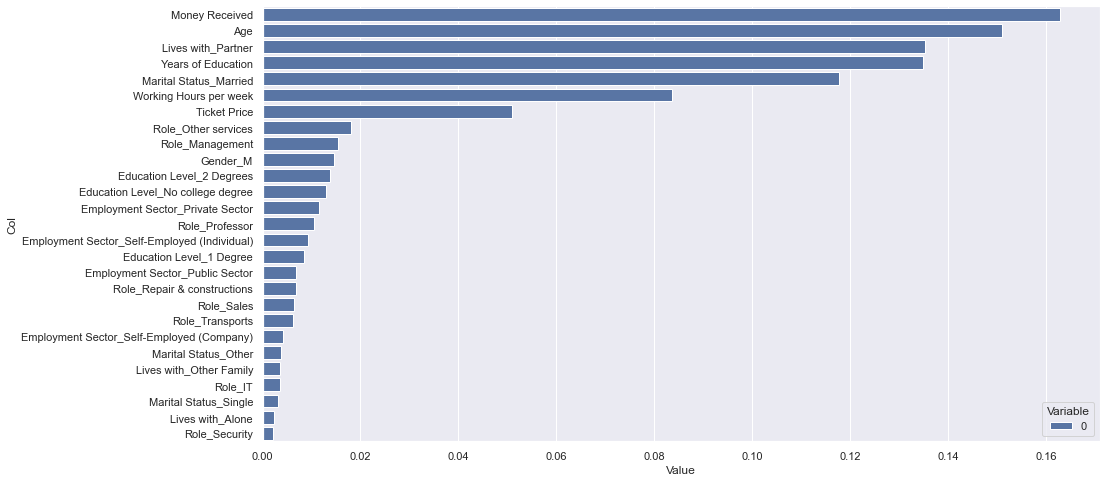

In [35]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [36]:
X_gb=X.drop(["Marital Status_Single","Lives with_Alone","Role_Security"],axis=1)

In [37]:
gb_columns=X_gb.columns

In [38]:
##Data Standardization

In [39]:
scaler = RobustScaler().fit(X_gb)
scaler_X = scaler.transform(X_gb)

### 8.4 -  Data Split after feature selection

Applying the data split of the data after the feature selection, based on feature importances has been done .

A new model is created, with the new data split, the predictions are made to the respective model, and the metrics function is used in order to calculate the f1-score, precision (measuring the proportion of correctly positive events from all events identified as positive) and recall (measures the rate of true positives events), for the macro average and weighted average.

The micro average for the f1-score is also calculated.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(scaler_X, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [253]:
gb = GradientBoostingClassifier(n_estimators=100,max_features=17,random_state=70,max_depth=5,min_samples_leaf=9) 
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features=17, min_samples_leaf=9,
                           random_state=70)

In [254]:
y_train_pred= gb.predict(X_train)
y_test_pred=gb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     13671
           1       0.81      0.65      0.72      4249

    accuracy                           0.88     17920
   macro avg       0.85      0.80      0.82     17920
weighted avg       0.88      0.88      0.87     17920

[[13015   656]
 [ 1501  2748]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [255]:
gb_f1_test= micro_f1_score(y_train,y_train_pred,y_test,y_test_pred)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
0.8796316964285713
_____________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
0.8734375


### 8.5 - Cross-Validation

Cross Validation is applied in order to estimate how precise the model is in practice. The ROC Curve is drawn in order to better visualize the AUC, area under the curve, illustrating the performance of the binary classifier.

In [248]:
cv_results = cross_validate(gb, X_train,y_train, cv=5, scoring=["f1_micro"])
gb_cross_f1=cv_results["test_f1_micro"].mean()
gb_cross_f1

0.8692522321428571

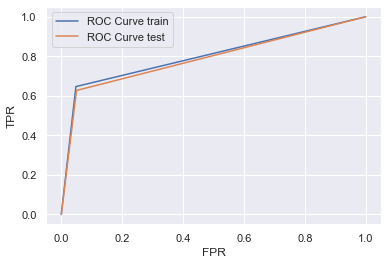

In [256]:
roc_curve_plot(gb,X_train,X_test,y_test,y_train)

### 8.6 - Grid Search Cv

Grid Search CV is applied in order to perform the hyperparameter tuning, so that it searches the best parameters defined by the user in a certain range. However, due to the high computational costs and time elapsed of this operation the group has decided to comment this step as the parameters after grid search are already defined when creating a new model after the feature selection for each model has been done.

This way the best performance for each classifier is already shown in the previous steps.

In [46]:
#max_depth_range=[5,6,7] 
#min_samples_leaf_range=[8,9,10,11]
#max_features_range=[12,15,17]
#n_estimators_range=[100,300,500]
#random_state_range=[20,35,70]

In [47]:
#param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
#grid=GridSearchCV(estimator=gb,param_grid=param_grid, cv =5)

In [48]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>9 - AdaBoost Classifier</font> <a class="anchor" id="nineth-bullet"></a>
    
</div>

[Back to TOC](#toc)

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

### 9.1 - Data Splitting

Splitting the variables acordingly to the respective train and test datasets.

X_train is the training data set. Y_train is the set of labels to all the data in X_train . The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### 9.2 - Model

Creation of an AdaBoost Classifier, accordingly with the parameters, attributes and methods avaliable at:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

In [50]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

Running the function defined in the section "2 - Functions", to compare the different scaler methods between themselves, when applied to the model that was previously created.

In [51]:
best_scale(abc,X_train,y_train,X_test,y_test)

,F1 Score
Standard,0.848884
MinMax,0.865625
MaxAbs,0.865625
Robust,0.865179
No Scaler,0.865625


### 9.3 - Feature Selection

Getting the features with most importance in the dataset, accordingly with the model that is being used. This is very helpful in a way that the features that have low or none relevance can be dropped in order to get a better performance for this model.
It is also created a barplot with the features importances to visualize the variables that are more important.

In [52]:
importances = abc.feature_importances_
indices = np.argsort(importances)

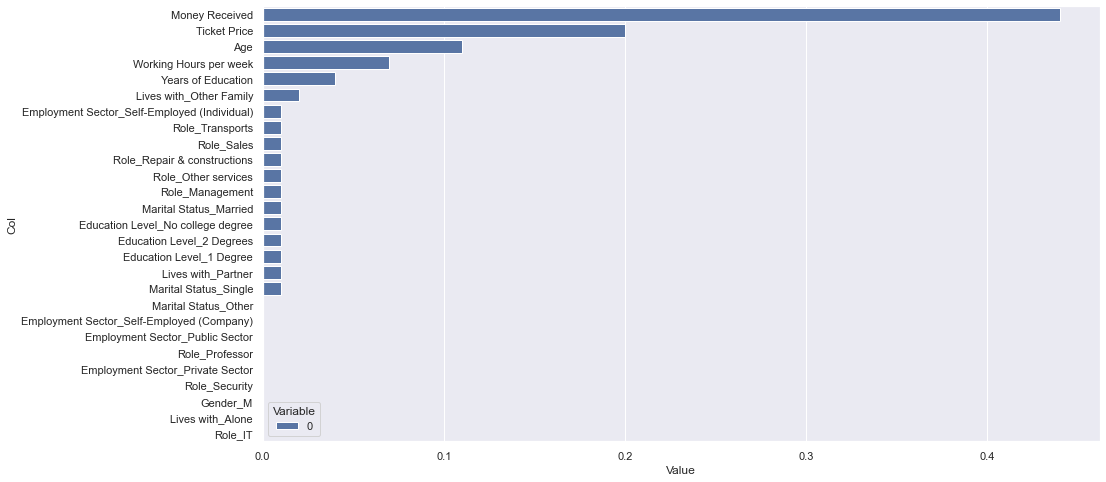

In [53]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [54]:
X_abc = X.drop(["Role_IT","Lives with_Alone","Employment Sector_Private Sector","Employment Sector_Self-Employed (Company)","Employment Sector_Private Sector","Marital Status_Other","Education Level_No college degree","Employment Sector_Public Sector","Role_Security","Role_Professor","Gender_M"],axis=1)

In [172]:
abc_columns=X_abc.columns

### 9.4 - Data Split after feature selection

Applying the data split of the data after the feature selection, based on feature importances has been done .

A new model is created, with the new data split, the predictions are made to the respective model, and the metrics function is used in order to calculate the f1-score, precision (measuring the proportion of correctly positive events from all events identified as positive) and recall (measures the rate of true positives events), for the macro average and weighted average.

The micro average for the f1-score is also calculated.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_abc, y, train_size=0.8, random_state=42) 

In [56]:
abc = AdaBoostClassifier(n_estimators=1000, random_state=5)
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1000, random_state=5)

In [57]:
y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     13680
           1       0.78      0.63      0.70      4240

    accuracy                           0.87     17920
   macro avg       0.84      0.79      0.81     17920
weighted avg       0.87      0.87      0.87     17920

[[12940   740]
 [ 1570  2670]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [58]:
ada_f1_test= micro_f1_score(y_train,y_train_pred,y_test,y_test_pred)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
0.87109375
_____________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
0.8707589285714286


### 9.5 - Cross-Validation

Cross Validation is applied in order to estimate how precise the model is in practice. The ROC Curve is drawn in order to better visualize the AUC, area under the curve, illustrating the performance of the binary classifier.

In [59]:
cv_results = cross_validate(abc, X_train,y_train, cv=5, scoring=["f1_micro"])
ada_cross_f1=cv_results["test_f1_micro"].mean()
ada_cross_f1

0.8685825892857142

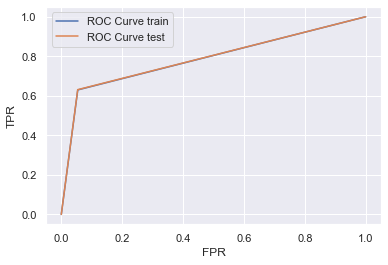

In [60]:
roc_curve_plot(abc,X_train,X_test,y_test,y_train)

### 9.6 - Grid Search Cv

Grid Search CV is applied in order to perform the hyperparameter tuning, so that it searches the best parameters defined by the user in a certain range. However, due to the high computational costs and time elapsed of this operation the group has decided to comment this step as the parameters after grid search are already defined when creating a new model after the feature selection for each model has been done.

This way the best performance for each classifier is already shown in the previous steps.

In [61]:
#algorithm=["SAMME","SAMME.R"] # best algorithm is SEMMA.R
#learning_rate_range=[0.01,1,5]
#n_estimators_range=[100,500,1000]
#random_state_range=[5,35,70]

In [62]:
#abc.get_params().keys()

In [63]:
#param_grid=dict(n_estimators=n_estimators_range, random_state=random_state_range)
#grid=GridSearchCV(estimator=abc,param_grid=param_grid, cv =5)

In [64]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>10 - Random Forest Classifier</font> <a class="anchor" id="tenth-bullet"></a>
    
</div>

[Back to TOC](#toc)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

### 10.1 - Data Splitting

Splitting the variables acordingly to the respective train and test datasets.

X_train is the training data set. Y_train is the set of labels to all the data in X_train . The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### 10.2 - Model 

Creation of a Random Forest Classifier, accordingly with the parameters, attributes and methods avaliable at:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [66]:
rf = RandomForestClassifier(class_weight={1:2},criterion="entropy",n_estimators=100,max_features=16,random_state=100,n_jobs=-1,max_depth=16,min_samples_leaf=8)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={1: 2}, criterion='entropy', max_depth=16,
                       max_features=16, min_samples_leaf=8, n_jobs=-1,
                       random_state=100)

Running the function defined in the section "2 - Functions", to compare the different scaler methods between themselves, when applied to the model that was previously created.

In [67]:
best_scale(rf,X_train,y_train,X_test,y_test)

,F1 Score
Standard,0.841741
MinMax,0.850446
MaxAbs,0.850893
Robust,0.849107
No Scaler,0.850893


### 10.3 - Feature Selection

Getting the features with most importance in the dataset, accordingly with the model that is being used. This is very helpful in a way that the features that have low or none relevance can be dropped in order to get a better performance for this model.
It is also created a barplot with the features importances to visualize the variables that are more important.

In [68]:
importances = rf.feature_importances_
indices = np.argsort(importances)

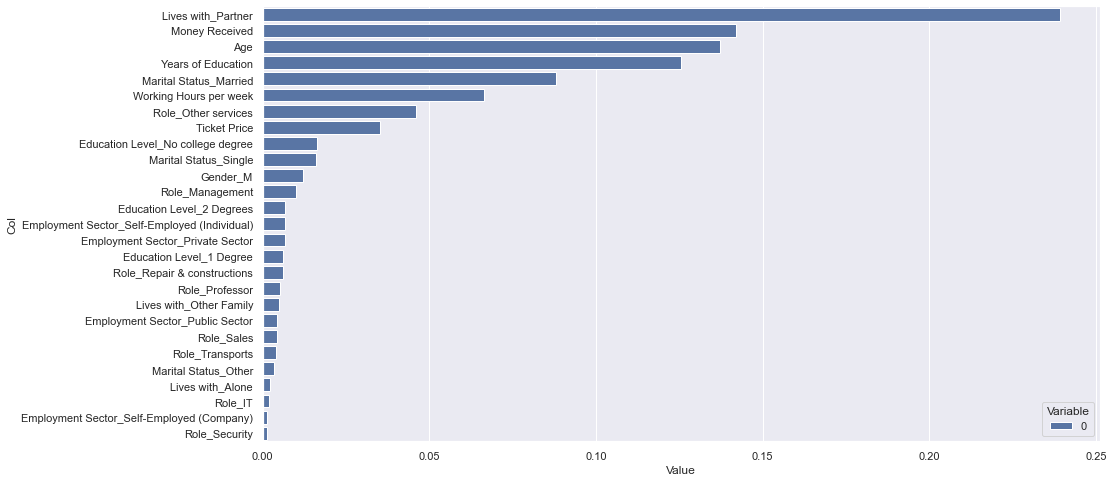

In [69]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [70]:
X_random = X.drop(["Role_Security","Employment Sector_Self-Employed (Company)","Role_IT","Lives with_Alone","Marital Status_Other"],axis=1)

In [71]:
rf_columns=X_random.columns

### 10.4 - Data Split after feature selection

Applying the data split of the data after the feature selection, based on feature importances has been done .

A new model is created, with the new data split, the predictions are made to the respective model, and the metrics function is used in order to calculate the f1-score, precision (measuring the proportion of correctly positive events from all events identified as positive) and recall (measures the rate of true positives events), for the macro average and weighted average.

The micro average for the f1-score is also calculated.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_random, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    stratify=y)

In [73]:
rf = RandomForestClassifier(criterion="entropy",n_estimators=100,max_features="log2",random_state=10,n_jobs=-1,max_depth=12,min_samples_leaf=3)
                           
                
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_features='log2',
                       min_samples_leaf=3, n_jobs=-1, random_state=10)

In [74]:
y_train_pred= rf.predict(X_train)
y_test_pred=rf.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     13671
           1       0.82      0.60      0.70      4249

    accuracy                           0.87     17920
   macro avg       0.85      0.78      0.81     17920
weighted avg       0.87      0.87      0.87     17920

[[13100   571]
 [ 1682  2567]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [75]:
rf_test_f1=micro_f1_score(y_train,y_train_pred,y_test,y_test_pred)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
0.8742745535714286
_____________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
0.8654017857142857


### 10.5 - Cross-Validation

Cross Validation is applied in order to estimate how precise the model is in practice. The ROC Curve is drawn in order to better visualize the AUC, area under the curve, illustrating the performance of the binary classifier.

In [76]:
cv_results = cross_validate(rf, X_train,y_train, cv=5, scoring=["f1_micro"])
rf_cross_f1=cv_results["test_f1_micro"].mean()
rf_cross_f1

0.8611607142857144

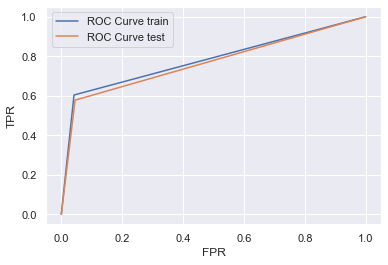

In [77]:
roc_curve_plot(rf,X_train,X_test,y_test,y_train)

### 10.6 - Grid Search Cv

Grid Search CV is applied in order to perform the hyperparameter tuning, so that it searches the best parameters defined by the user in a certain range. However, due to the high computational costs and time elapsed of this operation the group has decided to comment this step as the parameters after grid search are already defined when creating a new model after the feature selection for each model has been done.

This way the best performance for each classifier is already shown in the previous steps.

In [78]:
#max_depth_range=[12,13,15]
#min_samples_leaf_range=[3,7,8,9]
#max_features_range=[15,16,21,22]
#n_estimators_range=[100,500,1000]
#random_state_range=[70,100,120,200]

In [79]:
#param_grid=dict(max_features=max_features_range)
#grid=GridSearchCV(estimator=rf,param_grid=param_grid, cv =5)

In [80]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>11 - Multilayer Perceptron (MLP)</font> <a class="anchor" id="eleventh-bullet"></a>
    
</div>

[Back to TOC](#toc)

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). 

A Multilayer Perceptron (MLP) consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

### 11.1 - Feature Selection

Using the same variables that were used when applying the Random Forest Classifier.

In [81]:
X_MLP=X.loc[:,rf_columns]

### 11.2 - Data Splitting after Feature Selection

Splitting the variables acordingly to the respective train and test datasets.

X_train is the training data set. Y_train is the set of labels to all the data in X_train . The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_MLP, y, train_size=0.8, random_state=42,shuffle=True) 

### 11.3 - Model

Creation of a Multilayer Perceptron MLP, accordingly with the parameters, attributes and methods avaliable at:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [83]:
smote=SMOTE()
smote.fit(X_train,y_train)

SMOTE()

In [84]:
mlp = MLPClassifier(hidden_layer_sizes=(10))
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=10)

The predictions are made to the respective model, and the metrics function is used in order to calculate the f1-score, precision (measuring the proportion of correctly positive events from all events identified as positive) and recall (measures the rate of true positives events), for the macro average and weighted average.

The micro average for the f1-score is also calculated.

In [85]:
best_scale(mlp,X_train,y_train,X_test,y_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,F1 Score
Standard,0.854688
MinMax,0.852902
MaxAbs,0.851339
Robust,0.835938
No Scaler,0.821205


In [86]:
scaler = StandardScaler().fit(X_MLP)
scaler_mlp = scaler.transform(X_MLP)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(scaler_mlp, y, train_size=0.8, random_state=42,shuffle=True) 

In [88]:
mlp = MLPClassifier(hidden_layer_sizes=(10))
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=10)

In [89]:
y_train_pred= mlp.predict(X_train)
y_test_pred=mlp.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     13680
           1       0.73      0.62      0.67      4240

    accuracy                           0.86     17920
   macro avg       0.81      0.78      0.79     17920
weighted avg       0.85      0.86      0.85     17920

[[12716   964]
 [ 1599  2641]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [90]:
mlp_f1_test=micro_f1_score(y_train,y_train_pred,y_test,y_test_pred)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
0.8569754464285714
_____________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
0.8575892857142857


### 11.4 - Cross-Validation

Cross Validation is applied in order to estimate how precise the model is in practice. The ROC Curve is drawn in order to better visualize the AUC, area under the curve, illustrating the performance of the binary classifier.

In [91]:
cv_results = cross_validate(mlp, X_train,y_train, cv=10, scoring=["f1_micro"])
mlp_cross_f1=cv_results["test_f1_micro"].mean()
mlp_cross_f1

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8526785714285715

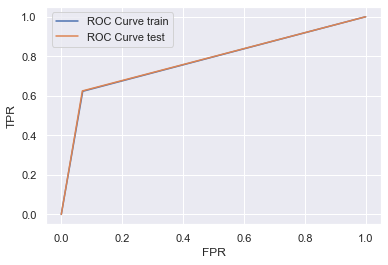

In [92]:
roc_curve_plot(mlp,X_train,X_test,y_test,y_train)

### 11.5 - Grid Search Cv

Grid Search CV is applied in order to perform the hyperparameter tuning, so that it searches the best parameters defined by the user in a certain range. However, due to the high computational costs and time elapsed of this operation the group has decided to comment this step as the parameters after grid search are already defined when creating a new model after the feature selection for each model has been done.

This way the best performance for each classifier is already shown in the previous steps.

In [93]:
#parameter_space = {
#    'hidden_layer_sizes': [(10,10,10), (10,10,10,10), (10)],
   # 'activation': ['tanh', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'learning_rate_init': list(np.linspace(0.00001,0.1,5)),
    #'learning_rate': ['constant','adaptive']
#}
#grid=GridSearchCV(mlp,parameter_space, cv=5)

In [94]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>12 - Decision Tree</font> <a class="anchor" id="twelveth-bullet"></a>
    
</div>

[Back to TOC](#toc)

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. 

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This structure helps in decision making.



### 12.1 - Data Splitting

Splitting the variables acordingly to the respective train and test datasets.

X_train is the training data set. Y_train is the set of labels to all the data in X_train . The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### 12.2 - Model

Creation of a Decision Tree, accordingly with the parameters, attributes and methods avaliable at:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [96]:
dt = DecisionTreeClassifier() 
dt.fit(X_train,y_train)

DecisionTreeClassifier()

Running the function defined in the section "2 - Functions", to compare the different scaler methods between themselves, when applied to the model that was previously created.

In [97]:
best_scale(dt,X_train,y_train,X_test,y_test)

,F1 Score
Standard,0.801116
MinMax,0.822098
MaxAbs,0.819420
Robust,0.818973
No Scaler,0.820982


### 12.3 - Feature Selection

Getting the features with most importance in the dataset, accordingly with the model that is being used. This is very helpful in a way that the features that have low or none relevance can be dropped in order to get a better performance for this model.
It is also created a barplot with the features importances to visualize the variables that are more important.

In [98]:
importances = dt.feature_importances_
indices = np.argsort(importances)

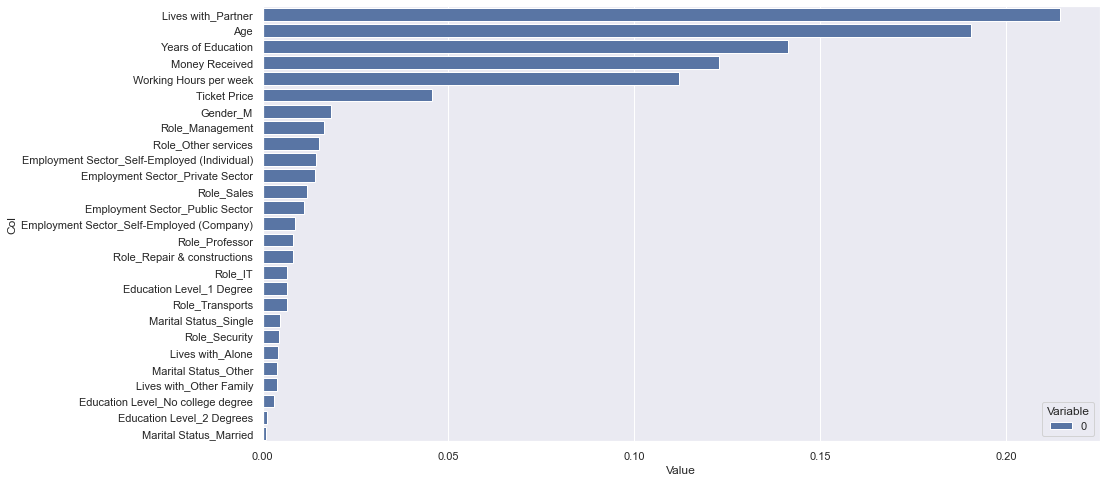

In [99]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [100]:
X_dt=X.drop(["Marital Status_Married","Lives with_Alone","Marital Status_Married","Role_Security","Lives with_Other Family","Education Level_1 Degree","Marital Status_Single","Education Level_2 Degrees","Role_Transports"],axis=1)

In [101]:
scaler = MaxAbsScaler().fit(X_dt)
scaler_dt = scaler.transform(X_dt)

### 12.4 - Data Split after feature selection

Applying the data split of the data after the feature selection, based on feature importances has been done .

A new model is created, with the new data split, the predictions are made to the respective model, and the metrics function is used in order to calculate the f1-score, precision (measuring the proportion of correctly positive events from all events identified as positive) and recall (measures the rate of true positives events), for the macro average and weighted average.

The micro average for the f1-score is also calculated.

In [102]:
X_train, X_test, y_train, y_test = train_test_split(scaler_dt, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [103]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=6,min_samples_split=4,min_samples_leaf=10,random_state=70) 
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       min_samples_split=4, random_state=70)

In [104]:
y_train_pred= dt.predict(X_train)
y_test_pred=dt.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13671
           1       0.80      0.52      0.63      4249

    accuracy                           0.86     17920
   macro avg       0.83      0.74      0.77     17920
weighted avg       0.85      0.86      0.84     17920

[[13106   565]
 [ 2027  2222]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [105]:
dt_f1_test=micro_f1_score(y_train,y_train_pred,y_test,y_test_pred)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
0.8553571428571428
_____________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
0.8575892857142857


### 12.5 - Cross-Validation

Cross Validation is applied in order to estimate how precise the model is in practice. The ROC Curve is drawn in order to better visualize the AUC, area under the curve, illustrating the performance of the binary classifier.

In [106]:
cv_results = cross_validate(dt, X_train,y_train, cv=5, scoring=["f1_micro"])
dt_cross_f1=cv_results["test_f1_micro"].mean()
dt_cross_f1

0.8531808035714287

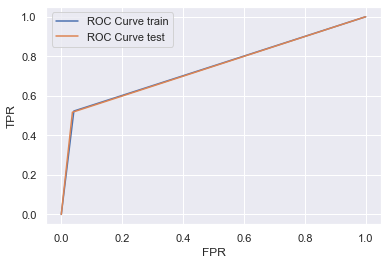

In [107]:
roc_curve_plot(dt,X_train,X_test,y_test,y_train)

### 12.6 - Grid Search Cv

Grid Search CV is applied in order to perform the hyperparameter tuning, so that it searches the best parameters defined by the user in a certain range. However, due to the high computational costs and time elapsed of this operation the group has decided to comment this step as the parameters after grid search are already defined when creating a new model after the feature selection for each model has been done.

This way the best performance for each classifier is already shown in the previous steps.

In [108]:
#criterion_range=["gini","entropy"] 
#max_depth_range=[2,4,6,8]
#min_samples_split_range=[4,6,8,10]
#min_samples_leaf_range=[4,6,8,10]
#random_state_range=[20,35,70]

In [109]:
#param_grid=dict(random_state=random_state_range)
#grid=GridSearchCV(estimator=dt,param_grid=param_grid, cv =5)

In [110]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>13 - Stochastic Gradient Descent (SGD)</font> <a class="anchor" id="thirteenth-bullet"></a>
    
</div>

[Back to TOC](#toc)

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (learning rate). 
For best results using the default learning rate schedule, the data should have zero mean and unit variance.

This implementation works with data represented as dense or sparse arrays of floating point values for the features.

### 13.1 - Feature Selection

Using the same variables that were used when applying the Random Forest Classifier.

In [155]:
X_sgd=X.loc[:,rf_columns]

### 13.2 - Data Split after Feature Selection

Splitting the variables acordingly to the respective train and test datasets.

X_train is the training data set. Y_train is the set of labels to all the data in X_train . The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_sgd, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    stratify=y)

### 13.3 - Model

Creation of a Stochastic Gradient Descent (SGD) Classifier, accordingly with the parameters, attributes and methods avaliable at:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [157]:
sgd= SGDClassifier(penalty='elasticnet',alpha=0.001,l1_ratio=0.2,random_state=70,n_jobs=-1)
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.001, l1_ratio=0.2, n_jobs=-1, penalty='elasticnet',
              random_state=70)

The predictions are made to the respective model, and the metrics function is used in order to calculate the f1-score, precision (measuring the proportion of correctly positive events from all events identified as positive) and recall (measures the rate of true positives events), for the macro average and weighted average.

The micro average for the f1-score is also calculated.

In [148]:
best_scale(sgd,X_train,y_train,X_test,y_test)

,F1 Score
Standard,0.848884
MinMax,0.839732
MaxAbs,0.838616
Robust,0.820089
No Scaler,0.823214


In [166]:
### tentamos scaler mas da piores resultados

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_sgd, y,test_size=0.2,random_state=15, stratify=y)

In [168]:
y_train_pred= sgd.predict(X_train)
y_test_pred=sgd.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     13671
           1       0.66      0.50      0.57      4249

    accuracy                           0.82     17920
   macro avg       0.76      0.71      0.73     17920
weighted avg       0.81      0.82      0.81     17920

[[12555  1116]
 [ 2113  2136]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [169]:
sgd_f1_test=micro_f1_score(y_train,y_train_pred,y_test,y_test_pred)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
0.8198102678571428
_____________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
0.8238839285714286


### 13.3 - Cross-Validation

Cross Validation is applied in order to estimate how precise the model is in practice. The ROC Curve is drawn in order to better visualize the AUC, area under the curve, illustrating the performance of the binary classifier.

In [170]:
cv_results = cross_validate(sgd, X_train,y_train, cv=5, scoring=["f1_micro"])
sgd_cross_f1=cv_results["test_f1_micro"].mean()

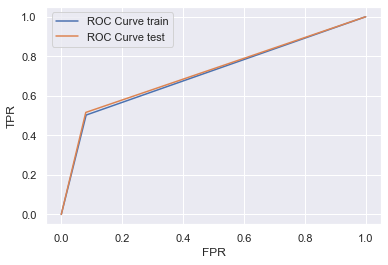

In [171]:
roc_curve_plot(sgd,X_train,X_test,y_test,y_train)

### 13.4 - Grid Search Cv

Grid Search CV is applied in order to perform the hyperparameter tuning, so that it searches the best parameters defined by the user in a certain range. However, due to the high computational costs and time elapsed of this operation the group has decided to comment this step as the parameters after grid search are already defined when creating a new model after the feature selection for each model has been done.

This way the best performance for each classifier is already shown in the previous steps.

In [121]:
#penalty_range=["l2","l1","elasticnet"] 
#alpha_range=[0.0001,0.001,0.01]
#l1_ratio_range=[0.15,0.20,0.25]
#epsilon_range=[0.1,0.15,0.20]
#random_state_range=[20,35,70]

In [122]:
#param_grid=dict(random_state=random_state_range)
#grid=GridSearchCV(estimator=sgd,param_grid=param_grid, cv =5)

In [123]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>14 - Extra Trees Classifier</font> <a class="anchor" id="fourteenth-bullet"></a>
    
</div>

[Back to TOC](#toc)

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

### 14.1 - Data Splitting

Splitting the variables acordingly to the respective train and test datasets.

X_train is the training data set. Y_train is the set of labels to all the data in X_train . The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### 14.2 - Model

Creation of an Extra Trees Classifier, accordingly with the parameters, attributes and methods avaliable at:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [125]:
etc = ExtraTreesClassifier() 
etc.fit(X_train,y_train)

ExtraTreesClassifier()

Running the function defined in the section "2 - Functions", to compare the different scaler methods between themselves, when applied to the model that was previously created.

In [126]:
best_scale(etc,X_train,y_train,X_test,y_test)

,F1 Score
Standard,0.828348
MinMax,0.827679
MaxAbs,0.828125
Robust,0.833705
No Scaler,0.828348


### 14.3 - Feature Selection

Getting the features with most importance in the dataset, accordingly with the model that is being used. This is very helpful in a way that the features that have low or none relevance can be dropped in order to get a better performance for this model.
It is also created a barplot with the features importances to visualize the variables that are more important.

In [127]:
importances = etc.feature_importances_
indices = np.argsort(importances)

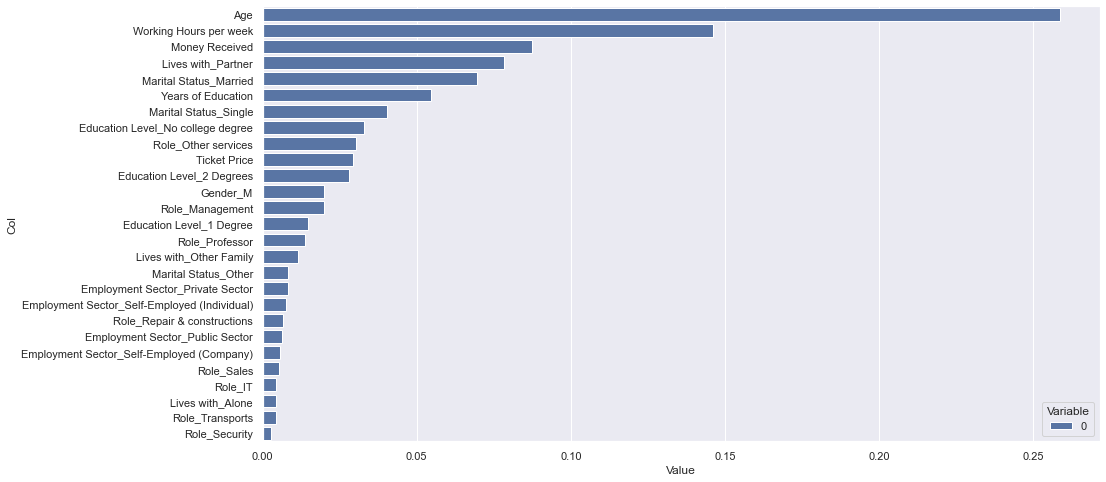

In [128]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [129]:
X_etc=X.drop(["Role_IT","Lives with_Alone","Role_Sales","Role_Security","Role_Transports","Employment Sector_Self-Employed (Company)","Role_Repair & constructions","Employment Sector_Self-Employed (Individual)","Marital Status_Other"],axis=1)

In [130]:
scaler = StandardScaler().fit(X_etc)
scaler_etc = scaler.transform(X_etc)

### 14.4 - Data Split after feature selection

Applying the data split of the data after the feature selection, based on feature importances has been done .

A new model is created, with the new data split, the predictions are made to the respective model, and the metrics function is used in order to calculate the f1-score, precision (measuring the proportion of correctly positive events from all events identified as positive) and recall (measures the rate of true positives events), for the macro average and weighted average.

The micro average for the f1-score is also calculated.

In [131]:
X_train, X_test, y_train, y_test = train_test_split(scaler_etc, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [132]:
etc = ExtraTreesClassifier(max_depth=10,min_samples_split=12,min_samples_leaf=4,max_features='log2',random_state=35,n_jobs=-1) 
etc.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                     min_samples_split=12, n_jobs=-1, random_state=35)

In [133]:
y_train_pred= etc.predict(X_train)
y_test_pred=etc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     13671
           1       0.75      0.52      0.61      4249

    accuracy                           0.85     17920
   macro avg       0.81      0.73      0.76     17920
weighted avg       0.84      0.85      0.84     17920

[[12954   717]
 [ 2044  2205]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [134]:
etc_f1_test = micro_f1_score(y_train,y_train_pred,y_test,y_test_pred)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
0.8459263392857143
_____________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
0.8477678571428571


### 14.5 - Cross-Validation

Cross Validation is applied in order to estimate how precise the model is in practice. The ROC Curve is drawn in order to better visualize the AUC, area under the curve, illustrating the performance of the binary classifier.

In [135]:
cv_results = cross_validate(etc, X_train,y_train, cv=5, scoring=["f1_micro"])
etc_cross_f1=cv_results["test_f1_micro"].mean()

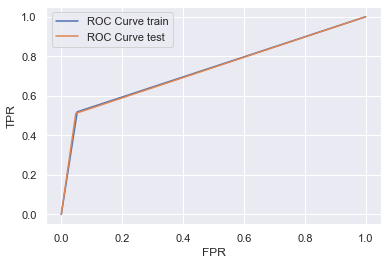

In [136]:
roc_curve_plot(etc,X_train,X_test,y_test,y_train)

### 14.6 - Grid Search Cv

Grid Search CV is applied in order to perform the hyperparameter tuning, so that it searches the best parameters defined by the user in a certain range. However, due to the high computational costs and time elapsed of this operation the group has decided to comment this step as the parameters after grid search are already defined when creating a new model after the feature selection for each model has been done.

This way the best performance for each classifier is already shown in the previous steps.

In [137]:
#criterion_range=["gini","entropy"] 
#max_depth_range=[4,6,8,10]
#min_samples_split_range=[6,8,10,12]
#min_samples_leaf_range=[4,6,8,10]
#max_features_range=["auto","sqrt","log2"]
#random_state_range=[20,35,70]

In [138]:
#param_grid=dict(random_state=random_state_range)
#grid=GridSearchCV(estimator=etc,param_grid=param_grid, cv =5)

In [139]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>15 - Overview</font> <a class="anchor" id="fifthteen-bullet"></a>
    
</div>

[Back to TOC](#toc)

### 15.1 - Conclusion

In [259]:
data={"Cross Validation Train F1":[sgd_cross_f1,dt_cross_f1,ada_cross_f1,gb_cross_f1,rf_cross_f1,etc_cross_f1,mlp_cross_f1],
      "F1 Test" : [sgd_f1_test,dt_f1_test,ada_f1_test,gb_f1_test,rf_test_f1,etc_f1_test,mlp_f1_test]}

In [260]:
conclusion=pd.DataFrame(data=data,index=["SGD","DT","ADA","GB","RF","ETC","MLP"])
conclusion

,Cross Validation Train F1,F1 Test
SGD,0.804185,0.823884
DT,0.853181,0.857589
ADA,0.868583,0.870759
GB,0.869252,0.873437
RF,0.861161,0.865402
ETC,0.839007,0.847768
MLP,0.852679,0.857589


As we can see from this table, the Classifier that presented the best performance was the Gradient Boost Classifier, in the Cross Validation Train F1 Score and in the Test F1 Score it was the Adaboost Classifier. The final model chosen is the __Gradient Boost__, because it is the one that presents the higher micro F1 score, measuring the F1-score of the aggregated contributions of all classes.

### 15.2 - Final Model

Creating a final Gradient Boost Classifier, with the parameters tuned after hyperparameter tuning.

In [249]:
X1=X[gb_columns]
y2=df.loc[:,"Income"]

In [250]:
scaler = RobustScaler().fit(X1)
scaler_X = scaler.transform(X1)

In [251]:
gb = GradientBoostingClassifier(n_estimators=100,max_features=17,random_state=70,max_depth=5,min_samples_leaf=9) 
gb.fit(scaler_X,y2)

GradientBoostingClassifier(max_depth=5, max_features=17, min_samples_leaf=9,
                           random_state=70)

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>16 - Export</font> <a class="anchor" id="sixthteen-bullet"></a>
    
</div>

[Back to TOC](#toc)

Exporting the results obtained to a CSV, in order to submit to Kaggle.

In [252]:
test = pd.read_excel("test.xlsx")
original=test.copy()
df.replace("?", np.nan, inplace=True)

test[["Gender","Name"]]=test["Name"].str.split(" ", n=1,expand=True)
test["Gender"].replace(["Mr."],"M",inplace=True)
test["Gender"].replace(["Miss","Mrs."],"F",inplace=True)
test[["Month","Year"]]=test['Birthday'].str.split(",",expand=True)
test["Year"]=test["Year"].astype(int)
test["Age"] = 2046 - test["Year"]
test.set_index("CITIZEN_ID",inplace=True)
test.drop(["Name","Month","Year","Birthday"],inplace=True,axis=1)

categorical = test.select_dtypes(include="object").columns.to_list()
numerical = test.columns.drop(categorical)

test["Marital Status"].replace(["Married - Spouse in the Army" ],"Married",inplace=True)
test["Marital Status"].replace(["Married - Spouse Missing" ,"Widow","Divorced"],"Other",inplace=True)
test["Lives with"].replace(["Husband","Wife" ],"Partner",inplace=True)
test["Lives with"].replace(["Other relatives","Children"],"Other",inplace=True)
test.drop(["Base Area","Native Continent"],axis=1,inplace=True)
categorical.remove("Base Area")
categorical.remove("Native Continent")

test["Education Level"].replace(["High School - 2nd Cycle","High School - 1st Cycle","Middle School Complete","Primary School","Preschool","High School Complete","High School - 1st Cycle","High School - 2nd Cycle","Professional School","Middle School - 1st Cycle","Middle School - 2nd Cycle"],"No college degree",inplace=True)
test["Education Level"].replace(["High School + PostGraduation","Bachelors","Professional School + PostGraduation"],"1 Degree",inplace=True)
test["Education Level"].replace(["Bachelors + PostGraduation","Masters"],"2 Degrees",inplace=True)
test["Education Level"].replace(["Masters + PostGraduation","PhD"],"3 Degrees",inplace=True)
test["Employment Sector"].replace(["Private Sector - Services ","Private Sector - Others"],"Private Sector",inplace=True)
test["Employment Sector"].replace(["Public Sector - Others","Public Sector - Government"],"Public Sector",inplace=True)
test["Employment Sector"].replace(["Unemployed","Never Worked"],"Other",inplace=True)
test["Role"].replace(["Cleaners & Handlers","Machine Operators & Inspectors","Administratives","Agriculture and Fishing","Household Services"],"Other services",inplace=True)

modes = test[categorical].mode().loc[0]
test.fillna(modes,inplace=True)

categorical=test.select_dtypes(include="object").columns.to_list()

df_ohc = test.copy()
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc[categorical])
ohc_feat_names = ohc.get_feature_names(categorical)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index,columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_ohc = pd.concat([ohc_df,df_ohc.drop(columns=categorical)], axis=1)
test=df_ohc.copy()
test=test[gb_columns]

scaler = RobustScaler().fit(test)
scaler_test = scaler.transform(test)

results=gb.predict(scaler_test)
# final dataframe

dataframe=pd.DataFrame()

dataframe["CITIZEN_ID"]=original["CITIZEN_ID"]
dataframe["Income"]= results

dataframe.to_csv("MAA_202021_44.csv",index=False)